# Tas (Heap)

In [1]:
import include.tas as h

Un tas est un tableau que l'on se représente comme un arbre binaire complet. 

Il respecte la condition de tas 

* tout élément est plus grand (ou égal) que ses enfants
* tout élément est plus petit (ou égal) que son parent 

Par exemple, le tableau suivant est un tas

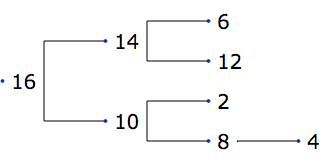

In [2]:
T = [ 16, 10, 14, 8, 2, 12, 6, 4]
h.afficher_tas(T)

## Indices

En numérotant les incides de $1$ à $n$,

* `T[i]` a pour enfants `T[2*i]` et `T[2*i+1]`
* `T[i]` a pour parent de `T[i // 2]`

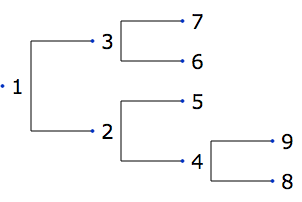

In [3]:
I1 = [ 1, 2, 3, 4, 5, 6, 7, 8, 9 ]
h.afficher_tas(I1)

En numérotant de $0$ à $n-1$,

* `T[i]` a pour enfants `T[2*i+1]` et `T[2*i+2]`
* `T[i]` a pour parent de `T[(i-1) // 2]`

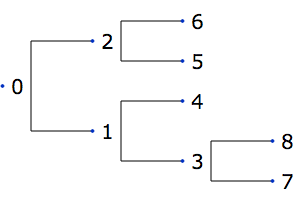

In [4]:
I0 = [ 0, 1, 2, 3, 4, 5, 6, 7, 8 ]
h.afficher_tas(I0)

In [5]:
def parent(i): return (i-1) // 2
def enfants(i): return 2*i+1, 2*i+2

## Insertion

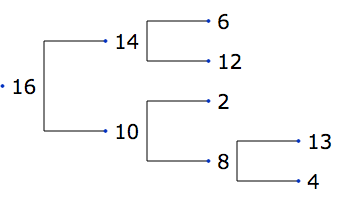

In [6]:
T.append(13)
h.afficher_tas(T)

In [7]:
def remonter(T,i):
    p = parent(i)
    while i > 0 and T[p] < T[i]:
        print("swap({},{})".format(T[i],T[p]))
        T[p],T[i] = T[i],T[p]
        i = p; p = parent(i)

swap(13,8)
swap(13,10)


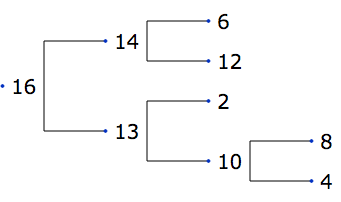

In [8]:
remonter(T,len(T)-1)
h.afficher_tas(T)

In [9]:
def inserer_dans_tas(T,val):
    T.append(val)
    remonter(T,len(T)-1)

## Suppression

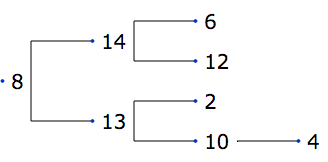

In [10]:
T[0],T[len(T)-1] = T[len(T)-1],T[0]
T.pop()
h.afficher_tas(T)

In [11]:
def plus_grand_enfant(T,i,n):
    pge, e2 = enfants(i)
    if e2 < n and T[e2] > T[pge]:
        pge = e2
    return pge
    
def descendre(T,i,n = None):
    if n == None: n = len(T) 
    e = plus_grand_enfant(T,i,n)
    while e < n and T[i] < T[e]:
        T[i],T[e] = T[e],T[i]
        i = e
        e = plus_grand_enfant(T,i,n)

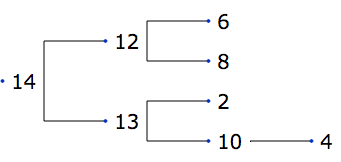

In [12]:
descendre(T,0)
h.afficher_tas(T)

In [13]:
def supprimer_du_tas(T):
    der = len(T)-1
    T[0],T[der] = T[der],T[0]
    descendre(T,0,der)
    T.pop()

## Création d'un tas

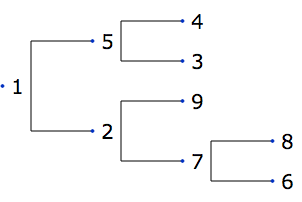

In [14]:
T = [ 1, 2, 5, 7, 9, 3, 4, 6, 8 ]
h.afficher_tas(T)

In [15]:
descendre(T,3)

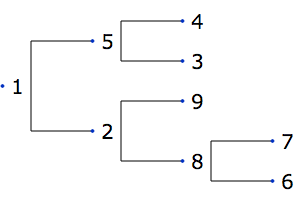

In [16]:
h.afficher_tas(T)

In [17]:
descendre(T,2)

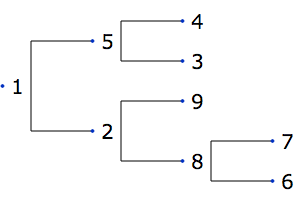

In [18]:
h.afficher_tas(T)

In [19]:
descendre(T,1)

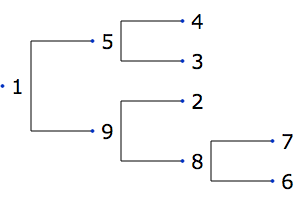

In [20]:
h.afficher_tas(T)

In [21]:
descendre(T,0)

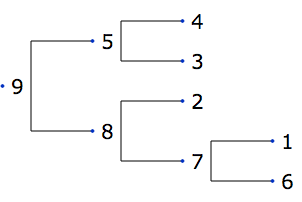

In [22]:
h.afficher_tas(T)

In [23]:
def creer_tas(T):
    dernier_parent = (len(T) // 2)-1
    for i in range(dernier_parent,-1,-1):
        descendre(T,i)

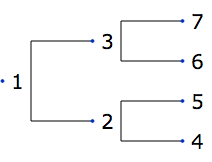

In [24]:
T = [ 1, 2, 3, 4, 5, 6, 7 ]
h.afficher_tas(T)

In [25]:
creer_tas(T)

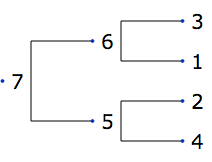

In [26]:
h.afficher_tas(T)

## Tri par tas 

In [27]:
def tri_par_tas(T):
    creer_tas(T)
    print(T)
    for i in range(len(T)-1,0,-1):
        T[i],T[0] = T[0],T[i]
        descendre(T,0,i)
        print(T[:i],T[i:])

In [28]:
T = [ 1, 2, 5, 7, 9, 3, 4, 6, 8 ]
tri_par_tas(T)

[9, 8, 5, 7, 2, 3, 4, 6, 1]
[8, 7, 5, 6, 2, 3, 4, 1] [9]
[7, 6, 5, 1, 2, 3, 4] [8, 9]
[6, 4, 5, 1, 2, 3] [7, 8, 9]
[5, 4, 3, 1, 2] [6, 7, 8, 9]
[4, 2, 3, 1] [5, 6, 7, 8, 9]
[3, 2, 1] [4, 5, 6, 7, 8, 9]
[2, 1] [3, 4, 5, 6, 7, 8, 9]
[1] [2, 3, 4, 5, 6, 7, 8, 9]


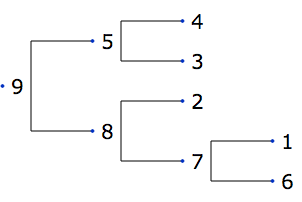

In [29]:
T = [ 1, 2, 5, 7, 9, 3, 4, 6, 8 ]
creer_tas(T)
h.afficher_tas(T)

In [30]:
i = 8; T[i],T[0] = T[0],T[i]; descendre(T,0,i)

[8, 7, 5, 6, 2, 3, 4, 1] [9]


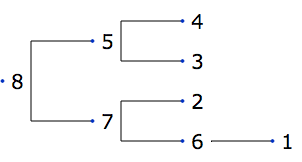

In [31]:
print(T[:i],T[i:]); h.afficher_tas(T[:i])

In [32]:
i = 7; T[i],T[0] = T[0],T[i]; descendre(T,0,i)

[7, 6, 5, 1, 2, 3, 4] [8, 9]


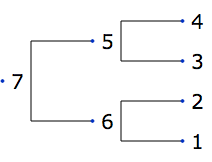

In [33]:
print(T[:i],T[i:]); h.afficher_tas(T[:i])

In [34]:
i = 6; T[i],T[0] = T[0],T[i]; descendre(T,0,i)

[6, 4, 5, 1, 2, 3] [7, 8, 9]


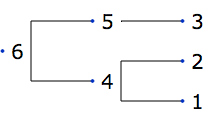

In [35]:
print(T[:i],T[i:]); h.afficher_tas(T[:i])

In [36]:
i = 5; T[i],T[0] = T[0],T[i]; descendre(T,0,i)

[5, 4, 3, 1, 2] [6, 7, 8, 9]


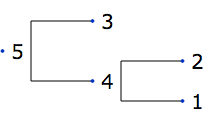

In [37]:
print(T[:i],T[i:]); h.afficher_tas(T[:i])

In [38]:
i = 4; T[i],T[0] = T[0],T[i]; descendre(T,0,i)

[4, 2, 3, 1] [5, 6, 7, 8, 9]


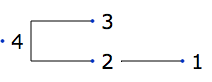

In [39]:
print(T[:i],T[i:]); h.afficher_tas(T[:i])

In [40]:
i = 3; T[i],T[0] = T[0],T[i]; descendre(T,0,i)

[3, 2, 1] [4, 5, 6, 7, 8, 9]


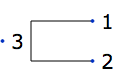

In [41]:
print(T[:i],T[i:]); h.afficher_tas(T[:i])

In [42]:
i = 2; T[i],T[0] = T[0],T[i]; descendre(T,0,i)

[2, 1] [3, 4, 5, 6, 7, 8, 9]


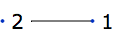

In [43]:
print(T[:i],T[i:]); h.afficher_tas(T[:i])

In [44]:
i = 1; T[i],T[0] = T[0],T[i]; descendre(T,0,i)

[1] [2, 3, 4, 5, 6, 7, 8, 9]


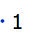

In [45]:
print(T[:i],T[i:]); h.afficher_tas(T[:i])